# Data preparation and exploration

1. Fetch all structures in KLIFS (metadata).
2. Filter dataset by
  - Species
  - DFG conformation
  - Resolution
  - Quality score
  - Best struture per kinase-PDB pair
3. Save the KLIFS structure IDs for the filtered dataset.
4. Explore dataset before and after filtering.

__Note__: The KLIFS data is prepared only on the basis of the structures' metadata from KLIFS. Additional filtering will happen during fingerprint generation, where the actual structural data (coordiantes ect.) are used.

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from opencadd.databases.klifs import setup_remote

from kissim.dataset import filters
from kissim.dataset import explorer

INFO:opencadd.databases.klifs.api:If you want to see an non-truncated version of the DataFrames in this module, use `pd.set_option('display.max_columns', 50)` in your notebook.


In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
SPECIES = "Human"
DFG_CONFORMATION = "in"
RESOLUTION_MAX = 4
QUALITYSCORE_MIN = 4
# TODO Import from kissim package!! 
ANCHOR_RESIDUES = {
    "hinge_region": [16, 47, 80],
    "dfg_region": [19, 24, 81],
    "front_pocket": [6, 48, 75]
}

## Fetch structures (metadata)

In [5]:
remote = setup_remote()

INFO:opencadd.databases.klifs.api:Set up remote session...
INFO:opencadd.databases.klifs.api:Remote session is ready!


In [6]:
structures = remote.structures.all_structures()
print(structures.shape)
structures.head()

(11671, 41)


,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath
0,2543,4gv1,A,A,Human,1,AKT1,None,None,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,0XZ,-,None,None,in,in,1.49,8.0,0,0,0.778,2.095,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,17.8309,58.4164,58.9605,None
1,10436,6c0i,A,A,Human,1,AKT1,None,None,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,-,-,None,None,in,in,2.40,8.0,0,0,0.778,2.092,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.9694,60.9649,60.1658,None
2,6763,3cqw,A,A,Human,1,AKT1,None,None,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,CQW,-,None,None,in,in,2.00,8.0,0,0,0.779,2.093,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.9435,58.2835,52.7742,None
3,6762,3cqu,B,A,Human,1,AKT1,None,None,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,CQU,-,None,None,in,in,2.20,8.0,0,0,0.783,2.104,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.4004,52.8051,47.1650,None
4,2538,3mvh,A,A,Human,1,AKT1,None,None,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,WFE,-,None,None,in,in,2.01,8.0,0,0,0.778,2.093,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,18.0522,59.5972,57.1354,None


## Explore structures in full dataset

### Species, DFG/aC-helix conformations, ligand

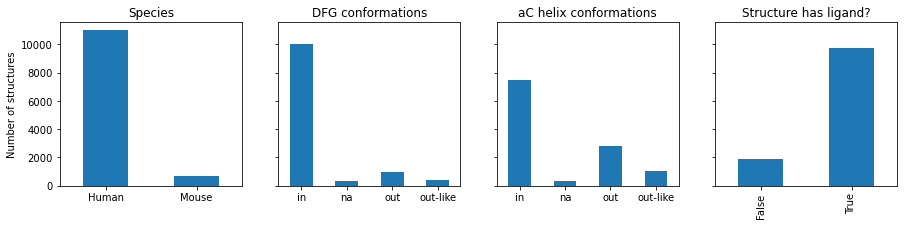

In [7]:
explorer.plot_important_categories(structures);

### Resolution vs. quality score

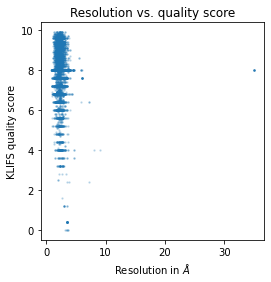

In [8]:
explorer.plot_resolution_vs_qualityscore(structures);

### Number of structures per kinase-PDB pair

How many kinase-PDB pairs are represented by how many structures?

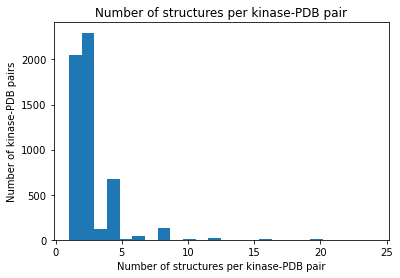

In [9]:
explorer.plot_number_of_structures_per_kinase_pdb_pair(structures);

## Filter structures

In [10]:
structures_filtered = (structures
 .pipe(filters.make_copy)
 .pipe(filters.select_species, SPECIES)
 .pipe(filters.select_dfg, DFG_CONFORMATION)
 .pipe(filters.select_resolution, RESOLUTION_MAX)
 .pipe(filters.select_qualityscore, QUALITYSCORE_MIN)
 .pipe(filters.select_best_pdb_kinase_pairs)
)
structures_filtered.reset_index(inplace=True, drop=True)

INFO:kissim.dataset.filters:make_copy                       11671 structures (-1 day, 23:59:59.997853s)
INFO:kissim.dataset.filters:select_species                  11011 structures (-1 day, 23:59:59.990499s)
INFO:kissim.dataset.filters:select_dfg                       9510 structures (-1 day, 23:59:59.994697s)
INFO:kissim.dataset.filters:select_resolution                9330 structures (-1 day, 23:59:59.993165s)
INFO:kissim.dataset.filters:select_qualityscore              9312 structures (-1 day, 23:59:59.993433s)
INFO:kissim.dataset.filters:select_best_pdb_kinase_pairs     4277 structures (-1 day, 23:59:59.961782s)


## Save filtered structures

In [11]:
#structures_filtered.to_csv("klifs_metadata_filtered.csv", index=None)

## Explore kinases in final dataset

### Number structures per kinase

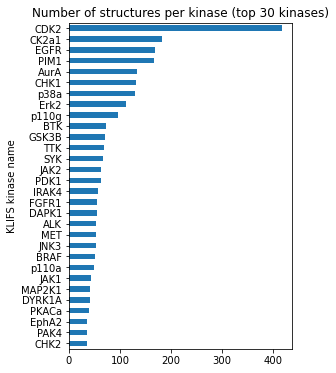

In [12]:
explorer.plot_number_of_structures_per_kinase(structures_filtered);

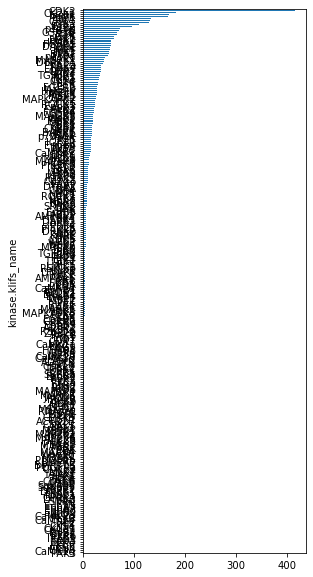

In [13]:
structures_filtered.groupby("kinase.klifs_name").size().sort_values().plot(kind="barh", figsize=(4,10));

In [14]:
for i in [1, 2, 3, 4, 5]:
    print(f"Number of kinase with {i} structure: {sum(structures_filtered.groupby('kinase.klifs_name').size() == i)}")
for i in [5, 10]:
    print(f"Number of kinase with > {i} structures: {sum(structures_filtered.groupby('kinase.klifs_name').size() > i)}")

Number of kinase with 1 structure: 66
Number of kinase with 2 structure: 33
Number of kinase with 3 structure: 16
Number of kinase with 4 structure: 16
Number of kinase with 5 structure: 18
Number of kinase with > 5 structures: 116
Number of kinase with > 10 structures: 78


### Number of kinases per kinase group

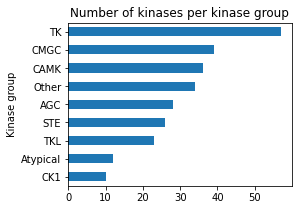

In [15]:
explorer.plot_number_of_kinases_per_kinase_group(structures_filtered, remote);

## Explore structures in final dataset

### Species, DFG/aC-helix conformations, ligand

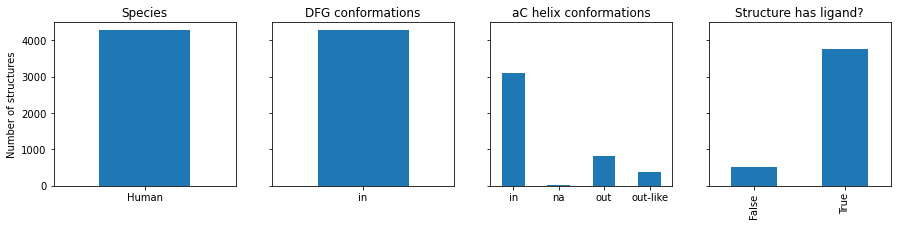

In [16]:
explorer.plot_important_categories(structures_filtered);

### Resolution vs. quality score

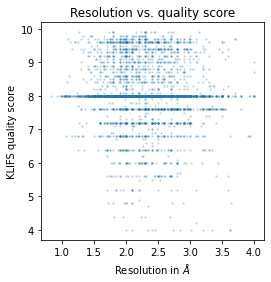

In [17]:
explorer.plot_resolution_vs_qualityscore(structures_filtered);

## Explore pockets in final dataset

### Missing residues in the kinase binding site

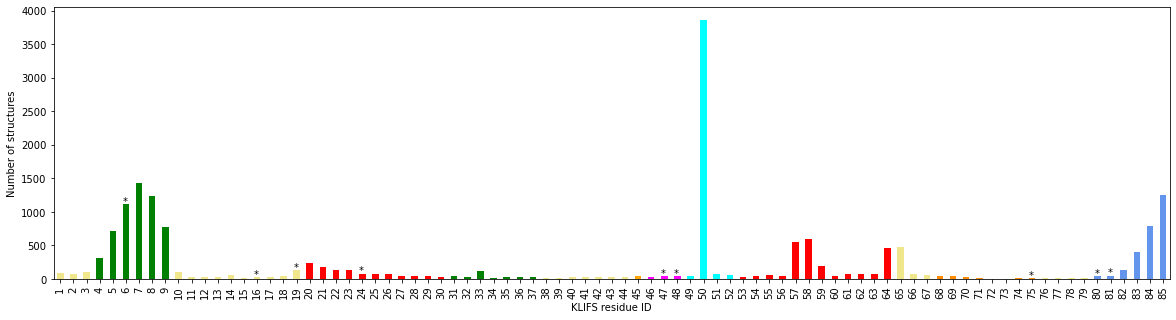

In [18]:
explorer.plot_missing_residues(structures, remote, ANCHOR_RESIDUES);

### Number of structures that will have no subpocket centers

... because the subpockets' anchor residues are missing (gaps in the structure).

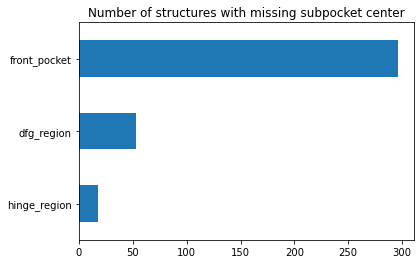

In [19]:
explorer.plot_missing_subpockets(structures_filtered, ANCHOR_RESIDUES);

### Modified residues

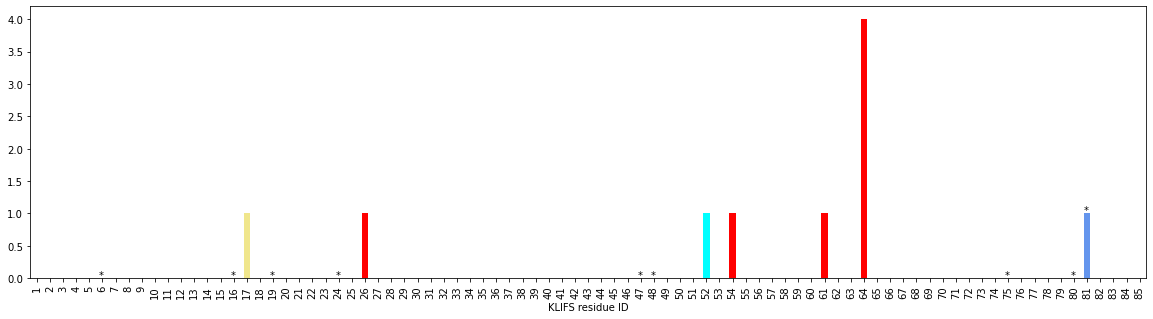

In [20]:
explorer.plot_modified_residues(structures_filtered, remote, ANCHOR_RESIDUES);

In [21]:
structures_filtered[structures_filtered["structure.pocket"].str.contains("X")]

,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath
198,2020,4j8m,-,A,Human,259,AurA,None,None,RPLGKGKFGNVYLLALKVLQLRREVEIQSHLRPNILRLYGYYLILE...,CJ5,-,None,None,in,out,1.85,8.0,0,0,0.837,2.069,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,20.3792,67.2635,45.1622,None
500,4389,1oir,-,A,Human,198,CDK2,None,None,EKIGEGTYGVVYKVALXKITAIREISLLKELNPNIVKLLDVYLVFE...,HDY,-,None,None,in,out,1.91,9.0,0,10,0.834,2.186,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,14.1404,48.0568,68.2467,None
997,1649,2ydj,-,A,Human,121,CHK1,None,None,QTLGEGAYGEVQLVAVKIVNIKKEIXINKMLNENVVKFYGHYLFLE...,YDJ,-,None,None,in,in,1.85,9.7,0,3,0.776,2.099,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.4342,57.4107,41.3220,None
1622,7215,2j5e,-,A,Human,406,EGFR,None,None,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,-,-,None,None,in,in,3.10,8.0,0,0,0.777,2.109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.2436,58.9093,24.0771,None
2648,3450,2r9s,-,A,Human,247,JNK3,None,None,KPIGSGAQGIVCAVAIKKLRAYRELVLMKCVNKNIISLLNVYLVME...,255,-,None,None,in,in,2.40,8.0,0,0,0.850,2.207,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,14.7668,49.0987,28.8980,None
3227,2444,1yhs,-,A,Human,160,PIM1,None,None,PLLGSGGFGSVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,STU,-,None,None,in,in,2.15,8.0,0,0,0.813,2.141,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.2773,53.1849,41.9412,None
3228,2398,1yi3,-,A,Human,160,PIM1,None,None,PLLGSGGFGSVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,LY2,-,None,None,in,in,2.50,8.0,0,0,0.802,2.134,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.5558,54.2631,41.4340,None
3229,2403,1yi4,-,A,Human,160,PIM1,None,None,PLLGSGGFGSVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,ADN,-,None,None,in,in,2.40,8.0,0,0,0.807,2.139,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.4236,53.6127,36.7024,None
3359,8654,5o12,-,A,Human,160,PIM1,None,None,PLLGS____SVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,1RO,-,None,None,in,in,2.40,7.6,4,8,0.803,2.006,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.0000,0.0000,0.0000,None
3510,9156,4otp,-,A,Human,100,RIOK1,None,None,GCISTGKEANVYHRAIKIYWAEKEMRNLIRLNIPCPEPIMLVLVMS...,ADP,-,None,None,in,in,2.70,9.2,0,4,1.585,3.036,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,16.7788,52.5202,20.1106,None
